In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data= pd.read_csv('C:\\Users\\Ramki\\Downloads\\DSA\\01. Python\\05. Statistics\\Datasets/train.csv')
data.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

## Key Elements of Descriptive Statistics

### Measures Of Central Tendency

* Mean
* Median
* Mode

### Measures Of Spread

* Range
* Outliers
* Interquantile Range
* Variance

### Dependence

* Correlation v/s Causation
* Covariance

#### Mean

In [4]:
mean = np.mean(data['SalePrice'])
print(mean)

180921.19589041095


#### Median

In [5]:
median=np.median(data['SalePrice'])
print(median)

163000.0


#### Mode

In [6]:
#1st way to find mode
from scipy import stats
mode=stats.mode(data['SalePrice'])
print(mode[0])

[140000]


In [7]:
#2nd way to find mode
salePrice=data['SalePrice']
mode2=salePrice.mode()
print(mode2)

0    140000
dtype: int64


#### Range
* Max value - Min value

In [8]:
Range= np.max(salePrice)-np.min(salePrice)
Range

720100

#### Variance
* The variance is a measure of how far each value in the data set is from the mean

In [9]:
variance= salePrice.var()
variance

6311111264.297451

#### Standard Deviation
* The standard deviation is simply the (positive) square root of the variance

In [10]:
from math import sqrt
std= sqrt(variance)
std

79442.50288288663

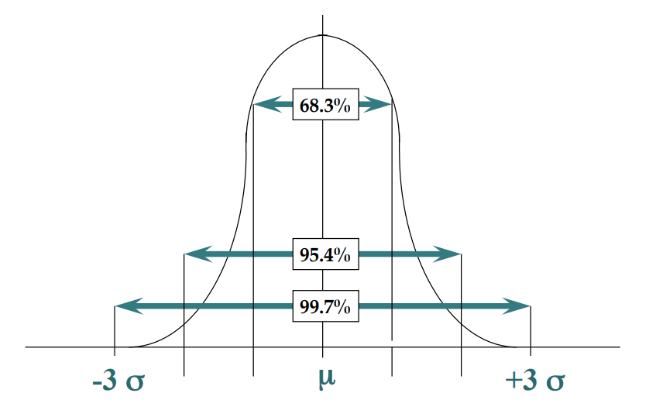

#### Inter Quantile Range

* Taking the concept of median a step further, we can define the Inter - Quartile Range.
* IQR is a measure of variability and is based on dividing a data set into quartiles.
* Quartile is the division of a set of observations into four intervals based on the values of the data.

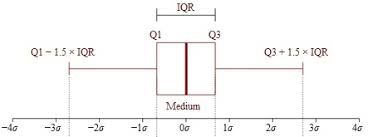

***The interquartile range is equal to Q3 minus Q1.***

#### Outliers with Box Plot

* The Boxplot above shows some additional observations below MINIMUM and above MAXIMUM. These are Outliers.
* There are many ways to mathematically represent or define outliers. One such method is using IQR.

In [11]:
x= salePrice.quantile(0.95)
x

326099.99999999994

In [12]:
### IQR 

# Median
median = np.median(data['SalePrice'])
print("Median :",median)

# lower quartile  
q1 = data['SalePrice'].quantile(0.25)

# upper quartile
q3 = data['SalePrice'].quantile(0.75)

# printing Results
print("Q1:", q1)
print("Q3:", q3)
print("IQR:", q3 - q1)

Median : 163000.0
Q1: 129975.0
Q3: 214000.0
IQR: 84025.0


In [13]:
## lets find no. of outliers

# for that we have to find the upper and ower outlier limit
outlier_lower_limit = q1 - 1.5*(q3 - q1)
outlier_upper_limit = q3 + 1.5*(q3 - q1)
print("Outlier Upper Limit :", outlier_lower_limit)
print("Outlier Lower Limit :", outlier_upper_limit)

Outlier Upper Limit : 3937.5
Outlier Lower Limit : 340037.5


In [14]:
Sales_price = data['SalePrice']

lower_limit_outliers = Sales_price[Sales_price < outlier_lower_limit].count()

upper_limit_outliers = Sales_price[Sales_price > outlier_upper_limit].count()

print("lower_limit_outliers:", lower_limit_outliers)
print("upper_limit_outliers:", upper_limit_outliers)
print("total outliers:", upper_limit_outliers + lower_limit_outliers)

lower_limit_outliers: 0
upper_limit_outliers: 61
total outliers: 61


#### Skewness

In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. The skewness value can be positive or negative, or undefined

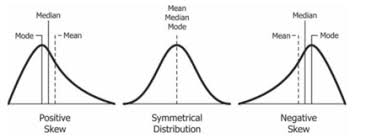

#### Correlation
* A correlation coefficient of 1 means that for every positive increase of 1 in one variable, there is a positive increase of 1 in the other.
* A correlation coefficient of -1 means that for every positive increase of 1 in one variable, there is a negative decrease of 1 in the other.
* Zero means that for every increase, there isn’t a positive or negative increase. The two just aren’t related.

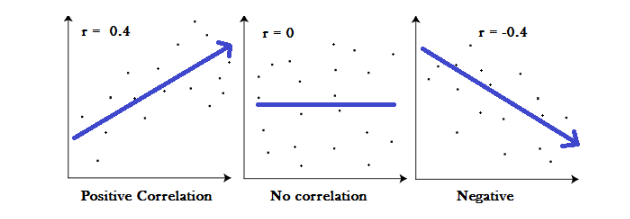

In [15]:
#considering 4 continous variable and finding the correlation

data[['LotArea','GrLivArea','GarageArea','SalePrice']].corr().style.background_gradient(cmap = 'Wistia')

,LotArea,GrLivArea,GarageArea,SalePrice
LotArea,1.000000,0.263116,0.180403,0.263843
GrLivArea,0.263116,1.000000,0.468997,0.708624
GarageArea,0.180403,0.468997,1.000000,0.623431
SalePrice,0.263843,0.708624,0.623431,1.000000


#### Covariance
* Covariance is between -infinity to +infinity
* Covariance's standardized version is correlation

In [16]:
data[['LotArea','GrLivArea','GarageArea','SalePrice']].cov().style.background_gradient(cmap = 'copper')

,LotArea,GrLivArea,GarageArea,SalePrice
LotArea,99625649.650342,1380033.488957,384987.194664,209211069.936373
GrLivArea,1380033.488957,276129.633363,52691.983857,29581866.743237
GarageArea,384987.194664,52691.983857,45712.510229,10589102.522742
SalePrice,209211069.936373,29581866.743237,10589102.522742,6311111264.297455
